In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

In [2]:
!nvidia-smi

Fri Dec 31 01:53:42 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 497.09       Driver Version: 497.09       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0    N/A /  N/A |    105MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Creating Helper Functions

Throughout your machine learning experiments, you'll likely come across snippets of code you want to use over and over again.

For example, a plotting function which plots a model's history object (see plot_loss_curves() below).

You could recreate these functions over and over again.

But as you might've guessed, rewritting the same functions becomes tedious.

One of the solutions is to store them in a helper script such as helper_functions.py. And then import the necesary functionality when you need it.

For example, you might write:

from helper_functions import plot_loss_curves

...

plot_loss_curves(his

In [3]:
!wget https://raw.githubusercontent.com/anmol-dwivedi/Udemy_TensorflowDeepLearningCourse_PracticeCode/main/helper_functions.py
    
# Import Helper Functions we're going to use
from helper_functions import create_tensorboard_callback, unzip_data, walk_through_dir

--2021-12-31 01:53:44--  https://raw.githubusercontent.com/anmol-dwivedi/Udemy_TensorflowDeepLearningCourse_PracticeCode/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10510 (10K) [text/plain]
Saving to: 'helper_functions.py.2'

     0K ..........                                            100% 1.75M=0.006s

2021-12-31 01:53:45 (1.75 MB/s) - 'helper_functions.py.2' saved [10510/10510]



Wonderful, now we've got a bunch of helper functions we can use throughout the notebook without having to rewrite them from scratch each time.

🔑 **Note**: If you're running this notebook in Google Colab, when it times out Colab will delete the helper_functions.py file. So to use the functions imported above, you'll have to rerun the cell.



# Let's Get Some Data

We saw in the previous notebook that we could get great results with only 10% of the training data using transfer learning with TensorFlow Hub.

In this notebook, we're going to continue to work with smaller subsets of the data, except this time we'll have a look at how we can use the in-built pretrained models within the **tf.keras.applications** module as well as how to fine-tune them to our own custom dataset.

We'll also practice using a new but similar dataloader function to what we've used before, **image_dataset_from_directory()** which is part of the **tf.keras.preprocessing** module.

Finally, we'll also be practicing using the **Keras Functional API** for building deep learning models. The Functional API is a more flexible way to create models than the tf.keras.Sequential API.

We'll explore each of these in more detail as we go.

Let's start by downloading some data.

In [4]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2021-12-31 01:53:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:830::2010, 2404:6800:4009:831::2010, 2404:6800:4009:829::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:830::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: '10_food_classes_10_percent.zip.1'

     0K .......... .......... .......... .......... ..........  0% 1.24M 2m9s
    50K .......... .......... .......... .......... ..........  0% 2.44M 98s
   100K .......... .......... .......... .......... ..........  0% 4.72M 76s
   150K .......... .......... .......... .......... ..........  0% 5.61M 64s
   200K .......... .......... .......... .......... ..........  0% 6.66M 56s
   250K .......... .......... .......... .......... ..........  0% 5.89M 52s
   300K .......... .......... ........

 43750K .......... .......... .......... .......... .......... 26% 11.0M 11s
 43800K .......... .......... .......... .......... .......... 26% 9.95M 11s
 43850K .......... .......... .......... .......... .......... 26% 14.6M 11s
 43900K .......... .......... .......... .......... .......... 26% 10.4M 11s
 43950K .......... .......... .......... .......... .......... 26% 12.0M 11s
 44000K .......... .......... .......... .......... .......... 26% 8.31M 11s
 44050K .......... .......... .......... .......... .......... 26% 13.1M 11s
 44100K .......... .......... .......... .......... .......... 26% 11.4M 11s
 44150K .......... .......... .......... .......... .......... 26% 11.9M 11s
 44200K .......... .......... .......... .......... .......... 26% 11.2M 11s
 44250K .......... .......... .......... .......... .......... 26% 12.4M 11s
 44300K .......... .......... .......... .......... .......... 26% 10.9M 11s
 44350K .......... .......... .......... .......... .......... 26% 10.7M 11s

120250K .......... .......... .......... .......... .......... 73% 13.8M 4s
120300K .......... .......... .......... .......... .......... 73% 11.3M 4s
120350K .......... .......... .......... .......... .......... 73% 11.4M 4s
120400K .......... .......... .......... .......... .......... 73% 7.95M 4s
120450K .......... .......... .......... .......... .......... 73% 14.4M 4s
120500K .......... .......... .......... .......... .......... 73% 10.2M 4s
120550K .......... .......... .......... .......... .......... 73% 12.4M 4s
120600K .......... .......... .......... .......... .......... 73% 11.2M 4s
120650K .......... .......... .......... .......... .......... 73% 12.4M 4s
120700K .......... .......... .......... .......... .......... 73% 11.4M 4s
120750K .......... .......... .......... .......... .......... 73% 11.1M 4s
120800K .......... .......... .......... .......... .......... 73% 8.46M 4s
120850K .......... .......... .......... .......... .......... 73% 12.4M 4s
120900K ....

In [5]:
# Check out how many images and subdirectories are in our dataset
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent\test'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent

In [6]:
# Create Training and Test Directories
train_dir = r"C:\Users\anmol\Desktop\TF\Udemy ZTM\6. Transfer Learning (Part 2)\10_food_classes_10_percent\train"
test_dir = r"C:\Users\anmol\Desktop\TF\Udemy ZTM\6. Transfer Learning (Part 2)\10_food_classes_10_percent\test"

Previously, we've used the **ImageDataGenerator class**. And while this works well and is still very commonly used, **this time we're going to use the image_data_from_directory function**.

It works much the same way as ImageDataGenerator's flow_from_directory method but **One of the main benefits of using tf.keras.prepreprocessing.image_dataset_from_directory() rather than ImageDataGenerator is that it creates a tf.data.Dataset object rather than a generator. The main advantage of this is the tf.data.Dataset API is much more efficient (faster) than the ImageDataGenerator API which is paramount for larger datasets.**

In [7]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = train_dir,
                                                                           image_size = IMG_SIZE,
                                                                           batch_size = BATCH_SIZE,
                                                                           label_mode = "categorical")

test_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(directory = test_dir,
                                                               batch_size = BATCH_SIZE,
                                                               image_size= IMG_SIZE,
                                                               label_mode = "categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


For now, the main parameters we're concerned about in the image_dataset_from_directory() funtion are:

 - **directory** - the filepath of the target directory we're loading images in from.
 - **image_size** - the target size of the images we're going to load in (height, width).
 - **batch_size** - the batch size of the images we're going to load in. For example if the batch_size is 32 (the default), batches of 32 images and labels at a time will be passed to the model.

There are more we could play around with if we needed to in the tf.keras.preprocessing documentation.

If we check the training data datatype we should see it as a BatchDataset with shapes relating to our data.

In [8]:
train_data_10_percent

<BatchDataset shapes: ((None, 224, 224, 3), (None, 10)), types: (tf.float32, tf.float32)>

In the above output:

- (None, 224, 224, 3) refers to the tensor shape of our images where None is the batch size, 224 is the height (and width) and 3 is the color channels (red, green, blue).
- (None, 10) refers to the tensor shape of the labels where None is the batch size and 10 is the number of possible labels (the 10 different food classes).
- Both image tensors and labels are of the datatype tf.float32.

The batch_size is None due to it only being used during model training. You can think of None as a placeholder waiting to be filled with the batch_size parameter from image_dataset_from_directory().

Another benefit of using the tf.data.Dataset API are the assosciated methods which come with it.

For example, if we want to find the name of the classes we were working with, we could use the class_names attribute.
`

In [9]:
# check out the class name attributes of our dataset
train_data_10_percent.class_names

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [10]:
# lets see an example batch of data
for images, labels in train_data_10_percent.take(1):
    print(images, labels)

tf.Tensor(
[[[[5.58571396e+01 2.46836739e+01 1.88775492e+00]
   [5.90459175e+01 3.18316345e+01 4.95408297e+00]
   [5.24285736e+01 2.90714302e+01 1.69897997e+00]
   ...
   [3.80713615e+01 2.06428356e+01 2.85709906e+00]
   [3.64744987e+01 1.94744987e+01 7.14285612e-01]
   [3.73010445e+01 2.23010426e+01 1.30104268e+00]]

  [[5.88877563e+01 2.88877563e+01 2.97959185e+00]
   [5.61326523e+01 2.99795914e+01 2.98469400e+00]
   [5.78877563e+01 3.45306129e+01 6.31632710e+00]
   ...
   [4.03009758e+01 2.28724480e+01 5.51523972e+00]
   [3.79949226e+01 2.09949245e+01 1.06124914e+00]
   [4.34286423e+01 2.64286423e+01 6.42864227e+00]]

  [[6.50459213e+01 3.73418388e+01 1.06224489e+01]
   [5.59285660e+01 2.98724480e+01 2.87244749e+00]
   [5.75000000e+01 3.40051003e+01 5.83673382e+00]
   ...
   [4.05510521e+01 2.27857800e+01 5.59694386e+00]
   [3.99285851e+01 2.25000134e+01 3.14287090e+00]
   [4.49286766e+01 2.75001049e+01 8.14296246e+00]]

  ...

  [[1.03418159e+01 1.11224804e+01 6.37762785e-01]
   [1

Notice how the image arrays come out as tensors of pixel values where as the labels come out as one-hot encodings (e.g. [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] for hamburger).

# Model 0: Building a Transfer Learning model using Keras Functional API

Alright, our data is tensor-ified, let's build a model.

To do so we're going to be using the **tf.keras.applications** module as it contains a series of already trained (on ImageNet) computer vision models as well as the Keras Functional API to construct our model.

We're going to go through the following steps:
1. Instantiate a pre-trained base model object by choosing a target model such as **EfficientNetB0** from **tf.keras.applications**, setting the **include_top parameter to False (we do this because we're going to create our own top, which are the output layers for the model)**.
2. Set the base model's **trainable attribute to False** to freeze all of the weights in the pre-trained model.
3. Define an input layer for our model, for example, what shape of data should our model expect?
4. [Optional] Normalize the inputs to our model if it requires. Some computer vision models such as ResNetV250 require their inputs to be between 0 & 1.

    🤔 **Note**: As of writing, the EfficientNet models in the tf.keras.applications module do not require images to be normalized (pixel values between 0 and 1) on input, where as many of the other models do.

1. Pass the inputs to the base model.
2. Pool the outputs of the base model into a shape compatible with the output activation layer (turn base model output tensors into same shape as label tensors). This can be done using **tf.keras.layers.GlobalAveragePooling2D()** or **tf.keras.layers.GlobalMaxPooling2D()** though the former is more common in practice.
3. Create an output activation layer using tf.keras.layers.Dense() with the appropriate activation function and number of neurons.
4. Combine the inputs and outputs layer into a model using tf.keras.Model().
5. Compile the model using the appropriate loss function and choose of optimizer.
6. Fit the model for desired number of epochs and with necessary callbacks (in our case, we'll start off with the TensorBoard callback).

In [11]:
# Create Base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model(so the pretrained patterns remain intact)
base_model.trainable = False

# 3.Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input_layer")

# 4. If using ResNet50V2, add this to speed up convergence, remove for EfficientNet
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. Pass the inputs to the base_model (note: using tf.keras.applications, EfficientNet inputs don't have to be normalized)
x = base_model(inputs)
# check data shape after passing it to the model
print(f"shape after base_model: {x.shape}")

# 6. Average Pool the outputs of the base model (aggregate all the most important information, reduce the number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
print(f"the shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the Model
model_0.compile(loss= "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# 10. Fit the Model (we use lesser steps for validation so its faster)
history_10_percent = model_0.fit(train_data_10_percent,
                                epochs = 5,
                                steps_per_epoch = len(train_data_10_percent),
                                validation_data = test_data_10_percent,
                                # Go through less of validation data so epochs are faster
                                validation_steps = int(0.25*len(test_data_10_percent)),
                                # Track our model's training logs for visualization
                                callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                         experiment_name = "10_percent_feature_extract")])

shape after base_model: (None, 7, 7, 1280)
the shape after GlobalAveragePooling2D: (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20211231-015422
Epoch 1/5


C:\Users\anmol\.conda\envs\tfgpu\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


24/24 [==============================] - 19s 291ms/step - loss: 1.8966 - accuracy: 0.3960 - val_loss: 1.3659 - val_accuracy: 0.6826
Epoch 2/5
24/24 [==============================] - 5s 188ms/step - loss: 1.1455 - accuracy: 0.7347 - val_loss: 0.9404 - val_accuracy: 0.7928
Epoch 3/5
24/24 [==============================] - 5s 185ms/step - loss: 0.8386 - accuracy: 0.8013 - val_loss: 0.7429 - val_accuracy: 0.8257
Epoch 4/5
24/24 [==============================] - 5s 186ms/step - loss: 0.6951 - accuracy: 0.8400 - val_loss: 0.6295 - val_accuracy: 0.8569
Epoch 5/5
24/24 [==============================] - 4s 184ms/step - loss: 0.5786 - accuracy: 0.8613 - val_loss: 0.5905 - val_accuracy: 0.8618


In [12]:
# Evaluate on the full test data
model_0.evaluate(test_data_10_percent)

79/79 [==============================] - 8s 103ms/step - loss: 0.6104 - accuracy: 0.8428


[0.6104275584220886, 0.8428000211715698]

Nice! After a minute or so of training our model performs incredibly well on both the training (87%+ accuracy) and test sets (~83% accuracy).

This is incredible. All thanks to the power of transfer learning.

It's important to note the kind of transfer learning we used here is called feature extraction transfer learning, similar to what we did with the TensorFlow Hub models.

In other words, we passed our custom data to an already pre-trained model (EfficientNetB0), asked it "what patterns do you see?" and then put our own output layer on top to make sure the outputs were tailored to our desired number of classes.

We also used the Keras Functional API to build our model rather than the Sequential API. For now, the benefits of this may not seem clear but when you start to build more sophisticated models, you'll probably want to use the Functional API. So it's important to have exposure to this way of building models.

In [13]:
# Check the layers in the base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 stem_conv_pad
4 stem_conv
5 stem_bn
6 stem_activation
7 block1a_dwconv
8 block1a_bn
9 block1a_activation
10 block1a_se_squeeze
11 block1a_se_reshape
12 block1a_se_reduce
13 block1a_se_expand
14 block1a_se_excite
15 block1a_project_conv
16 block1a_project_bn
17 block2a_expand_conv
18 block2a_expand_bn
19 block2a_expand_activation
20 block2a_dwconv_pad
21 block2a_dwconv
22 block2a_bn
23 block2a_activation
24 block2a_se_squeeze
25 block2a_se_reshape
26 block2a_se_reduce
27 block2a_se_expand
28 block2a_se_excite
29 block2a_project_conv
30 block2a_project_bn
31 block2b_expand_conv
32 block2b_expand_bn
33 block2b_expand_activation
34 block2b_dwconv
35 block2b_bn
36 block2b_activation
37 block2b_se_squeeze
38 block2b_se_reshape
39 block2b_se_reduce
40 block2b_se_expand
41 block2b_se_excite
42 block2b_project_conv
43 block2b_project_bn
44 block2b_drop
45 block2b_add
46 block3a_expand_conv
47 block3a_expand_bn
48 block3a_expand_activation
49 block3a_dwcon

In [14]:
# Get the model summary for our base model
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

                                                                                                  
 block6c_se_reduce (Conv2D)     (None, 1, 1, 48)     55344       ['block6c_se_reshape[0][0]']     
                                                                                                  
 block6c_se_expand (Conv2D)     (None, 1, 1, 1152)   56448       ['block6c_se_reduce[0][0]']      
                                                                                                  
 block6c_se_excite (Multiply)   (None, None, None,   0           ['block6c_activation[0][0]',     
                                1152)                             'block6c_se_expand[0][0]']      
                                                                                                  
 block6c_project_conv (Conv2D)  (None, None, None,   221184      ['block6c_se_excite[0][0]']      
                                192)                                                              
          



You can see how each of the different layers have a certain number of parameters each. Since we are using a pre-trained model, you can think of all of these parameters are patterns the base model has learned on another dataset. And because we set base_model.trainable = False, these patterns remain as they are during training (they're frozen and don't get updated).

Alright that was the base model, let's see the summary of our overall model.


In [15]:
# get the model summary for model_0
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


Our overall model has five layers but really, one of those layers **(efficientnetb0) has 236 layers**.

You can see how the output shape started out as **(None, 224, 224, 3)** for the input layer (the shape of our images) but was transformed to be **(None, 10)** by the output layer (the shape of our labels), where None is the placeholder for the batch size.

Notice too, the only trainable parameters in the model are those in the output layer.

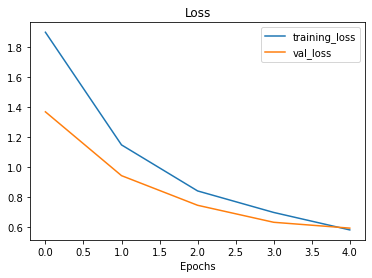

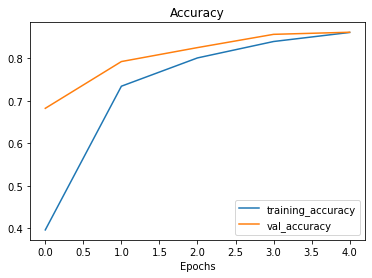

In [16]:
# import loss curve from helper.py
from helper_functions import plot_loss_curves

# check the model's training curves
plot_loss_curves(history_10_percent)

# Getting a Feature Vector from a Trained Model

🤔 **Question**: What happens with the tf.keras.layers.GlobalAveragePooling2D() layer? I haven't seen it before.

The tf.keras.layers.GlobalAveragePooling2D() layer transforms a 4D tensor into a 2D tensor by averaging the values across the inner-axes.

The previous sentence is a bit of a mouthful, so let's see an example.
We will use a similar shaped tensor of (1,4,4,3) and then pass it to the GlobalAveragePooling2D

In [17]:
# Define input tensor shape (same number of dimensions as the output of efficientnetb0)
input_shape = (1, 4, 4, 3)

# Create a random tensor
tf.random.set_seed(42)
input_tensor = tf.random.normal(input_shape)
print(f"Random input tensor:\n {input_tensor}\n")

# Pass the random tensor through a global average pooling 2D layer
global_average_pooled_tensor = tf.keras.layers.GlobalAveragePooling2D()(input_tensor)
print(f"2D global average pooled random tensor:\n {global_average_pooled_tensor}\n")

# Check the shapes of the different tensors
print(f"Shape of input tensor: {input_tensor.shape}")
print(f"Shape of 2D global averaged pooled input tensor: {global_average_pooled_tensor.shape}")

Random input tensor:
 [[[[ 0.3274685  -0.8426258   0.3194337 ]
   [-1.4075519  -2.3880599  -1.0392479 ]
   [-0.5573232   0.539707    1.6994323 ]
   [ 0.28893656 -1.5066116  -0.2645474 ]]

  [[-0.59722406 -1.9171132  -0.62044144]
   [ 0.8504023  -0.40604794 -3.0258412 ]
   [ 0.9058464   0.29855987 -0.22561555]
   [-0.7616443  -1.8917141  -0.93847126]]

  [[ 0.77852213 -0.47338897  0.97772694]
   [ 0.24694404  0.20573747 -0.5256233 ]
   [ 0.32410017  0.02545409 -0.10638497]
   [-0.6369475   1.1603122   0.2507359 ]]

  [[-0.41728503  0.4012578  -1.4145443 ]
   [-0.5931857  -1.6617213   0.33567193]
   [ 0.10815629  0.23479682 -0.56668764]
   [-0.35819843  0.88698614  0.52744764]]]]

2D global average pooled random tensor:
 [[-0.09368646 -0.45840448 -0.2885598 ]]

Shape of input tensor: (1, 4, 4, 3)
Shape of 2D global averaged pooled input tensor: (1, 3)


You can see the tf.keras.layers.GlobalAveragePooling2D() layer condensed the input tensor from shape (1, 4, 4, 3) to (1, 3). It did so by averaging the input_tensor across the middle two axes.

We can replicate this operation using the tf.reduce_mean() operation and specifying the appropriate axes.

The tf.keras.layers.GlobalAveragePooling2D layer condenses the input tensor into a vector. This vector is called as a feature vector.

In [18]:
# This is the same as GlobalAveragePooling2D()
tf.reduce_mean(input_tensor, axis=[1, 2]) # average across the middle axes

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[-0.09368646, -0.45840448, -0.2885598 ]], dtype=float32)>

Doing this not only makes the output of the base model compatible with the input shape requirement of our output layer (tf.keras.layers.Dense()), it also **condenses the information found by the base model into a lower dimension feature vector.**

🔑 **Note**: One of the reasons feature extraction transfer learning is named how it is is because what often happens is a pretrained model outputs a **feature vector (a long tensor of numbers, in our case, this is the output of the tf.keras.layers.GlobalAveragePooling2D() layer) which can then be used to extract patterns out of.**

# Runnning A Series of Transfer learning

We've seen the incredible results of transfer learning on 10% of the training data, what about 1% of the training data?

What kind of results do you think we can get using 100x less data than the original CNN models we built ourselves?

Why don't we answer that question while running the following modelling experiments:

 - **model_1**: Use feature extraction transfer learning on 1% of the training data with data augmentation.
 - **model_2**: Use feature extraction transfer learning on 10% of the training data with data augmentation.
 - **model_3**: Use fine-tuning transfer learning on 10% of the training data with data augmentation.
 - **model_4**: Use fine-tuning transfer learning on 100% of the training data with data augmentation.

While all of the experiments will be run on different versions of the training data, they will all be evaluated on the same test dataset, this ensures the results of each experiment are as comparable as possible.

All experiments will be done using the EfficientNetB0 model within the tf.keras.applications module.

To make sure we're keeping track of our experiments, we'll use our create_tensorboard_callback() function to log all of the model training logs.

We'll construct each model using the Keras Functional API and instead of implementing data augmentation in the ImageDataGenerator class as we have previously, we're going to build it right into the model using the tf.keras.layers.experimental.preprocessing module.

In [19]:
# Download and Unzip data (preprocessed from Food 101)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

unzip_data("10_food_classes_1_percent.zip")

--2021-12-31 01:55:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:830::2010, 2404:6800:4009:831::2010, 2404:6800:4009:829::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:830::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: '10_food_classes_1_percent.zip.1'

     0K .......... .......... .......... .......... ..........  0% 1.64M 77s
    50K .......... .......... .......... .......... ..........  0% 3.02M 60s
   100K .......... .......... .......... .......... ..........  0% 5.80M 47s
   150K .......... .......... .......... .......... ..........  0% 6.43M 40s
   200K .......... .......... .......... .......... ..........  0% 8.19M 35s
   250K .......... .......... .......... .......... ..........  0% 8.40M 32s
   300K .......... .......... .......... 

 65200K .......... .......... .......... .......... .......... 50% 8.82M 6s
 65250K .......... .......... .......... .......... .......... 50% 12.3M 6s
 65300K .......... .......... .......... .......... .......... 50% 9.68M 6s
 65350K .......... .......... .......... .......... .......... 50% 9.68M 6s
 65400K .......... .......... .......... .......... .......... 50% 19.4M 6s
 65450K .......... .......... .......... .......... .......... 50% 11.7M 6s
 65500K .......... .......... .......... .......... .......... 50% 10.4M 6s
 65550K .......... .......... .......... .......... .......... 50% 12.3M 6s
 65600K .......... .......... .......... .......... .......... 50% 7.87M 6s
 65650K .......... .......... .......... .......... .......... 50% 12.2M 6s
 65700K .......... .......... .......... .......... .......... 50% 12.9M 6s
 65750K .......... .......... .......... .......... .......... 50% 11.6M 6s
 65800K .......... .......... .......... .......... .......... 50% 10.9M 6s
 65850K ....

In [20]:
# Create Training and Test Directories
train_dir = "10_food_classes_1_percent/train"
test_dir = "10_food_classes_1_percent/test"

In [21]:
# Inspect How many images we are working with
walk_through_dir("10_food_classes_1_percent")

There are 2 directories and 0 images in '10_food_classes_1_percent'.
There are 10 directories and 0 images in '10_food_classes_1_percent\test'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\steak'.
There are 0 directories and 250 images in '10_food_classes_1_percent\test\sushi'

In [22]:
# Setup the Data Loaders
IMG_SIZE = (224,224)
BATCH_SIZE = 32
train_data_1_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode = "categorical",
                                                                           batch_size=BATCH_SIZE,
                                                                          image_size=IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode = "categorical",
                                                                image_size = IMG_SIZE,
                                                               batch_size = BATCH_SIZE)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


### Adding Data Augmentation Right into the Model

Previously we've used the different parameters of the ImageDataGenerator class to augment our training images, this time we're going to build data augmentation right into the model.

How?

**Using the tf.keras.layers.experimental.preprocessing module and creating a dedicated data augmentation layer.**

This a relatively new feature added to TensorFlow 2.2+ but it's very powerful. Adding a data augmentation layer to the model has the following benefits:

 - Preprocessing of the images (augmenting them) happens on the GPU rather than on the CPU (much faster).
 - Images are best preprocessed on the GPU where as text and structured data are more suited to be preprocessed on the CPU.
 - Image data augmentation only happens during training so we can still export our whole model and use it elsewhere. And if someone else wanted to train the same model as us, including the same kind of data augmentation, they could.


To use data augmentation right within our model we'll create a Keras Sequential model consisting of only data preprocessing layers, we can then use this Sequential model within another Functional model.

If that sounds confusing, it'll make sense once we create it in code.

The data augmentation transformations we're going to use are:

 - RandomFlip - flips image on horizontal or vertical axis.
 - RandomRotation - randomly rotates image by a specified amount.
 - RandomZoom - randomly zooms into an image by specified amount.
 - RandomHeight - randomly shifts image height by a specified amount.
 - RandomWidth - randomly shifts image width by a specified amount.
 - Rescaling - normalizes the image pixel values to be between 0 and 1, this is worth mentioning because it is required for some image models but since we're using the tf.keras.applications implementation of EfficientNetB0, it's not required.

In [23]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create data augmentation stage with horizontalflipping, rotations, zoom etc
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    # preprocessing.Rescale(1./225) # keep for models like resnet50v2 but remove for efficientnetB0
])

### Visualize our Data Augmentation layer (and see what happens to our data)

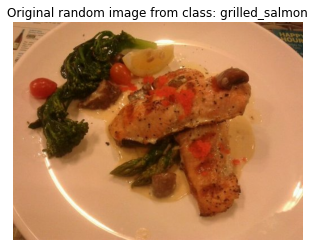

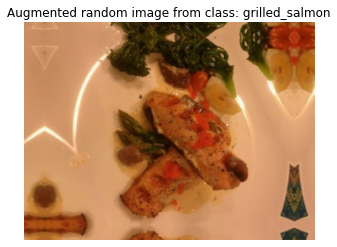

In [24]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1_percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path

# read in the chosen target image and plot it
img = mpimg.imread(random_image_path) 
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

# Model 1: Feature Extraction Transfer Learning on 1% of the data with data augmentation

In [25]:
# setup input shape and base model, freeze the base model layers
input_shape = (224, 224,3)
base_model = tf.keras.applications.EfficientNetB0(include_top= False)
base_model.trainable = False

# Create the input layer
inputs = tf.keras.layers.Input(shape= input_shape, name="input_layer")

# Add in data augmentation Sequential Model as layer
x = data_augmentation(inputs)

# Give base_model the inputs (after augmentation) and don't train it
x = base_model(x, training=False)

# Pull the out features of the base model
x = layers.GlobalAveragePooling2D()(x)

# Put a dense layer on as the output
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

# Make a model using the inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_1_percent,
                       epochs = 5,
                       steps_per_epoch = len(train_data_1_percent),
                       validation_data = test_data,
                       validation_steps = int(0.25* len(test_data)),
                       # Track the model training logs
                       callbacks = [create_tensorboard_callback(dir_name = "transfer_learning",
                                                                experiment_name = "1_percent_data_aug")])

Saving TensorBoard log files to: transfer_learning/1_percent_data_aug/20211231-015529
Epoch 1/5
3/3 [==============================] - 11s 3s/step - loss: 2.4195 - accuracy: 0.0857 - val_loss: 2.2301 - val_accuracy: 0.1793
Epoch 2/5
3/3 [==============================] - 4s 1s/step - loss: 2.1781 - accuracy: 0.1714 - val_loss: 2.0956 - val_accuracy: 0.2582
Epoch 3/5
3/3 [==============================] - 4s 2s/step - loss: 1.9667 - accuracy: 0.4000 - val_loss: 2.0074 - val_accuracy: 0.3174
Epoch 4/5
3/3 [==============================] - 4s 2s/step - loss: 1.8297 - accuracy: 0.5143 - val_loss: 1.9121 - val_accuracy: 0.3816
Epoch 5/5
3/3 [==============================] - 3s 1s/step - loss: 1.6525 - accuracy: 0.5714 - val_loss: 1.8333 - val_accuracy: 0.4408


Wow! How cool is that? Using only 7 training images per class, using transfer learning our model was able to get ~40% accuracy on the validation set. This result is pretty amazing since the original Food-101 paper achieved 50.67% accuracy with all the data, namely, 750 training images per class (note: this metric was across 101 classes, not 10, we'll get to 101 classes soon).

In [26]:
# check model summary
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, None, None, 3)     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
____________________________________________



There it is. We've now got data augmentation built right into the our model. This means if we saved it and reloaded it somewhere else, the data augmentation layers would come with it.

The important thing to remember is **data augmentation only runs during training**. So if we were to evaluate or use our model for inference (predicting the class of an image) the data augmentation layers will be automatically turned off.

To see this in action, let's evaluate our model on the test da

In [27]:
# Evaluate on the full test dataset
resuts_1_percent_data_aug = model_1.evaluate(test_data)
resuts_1_percent_data_aug 

79/79 [==============================] - 8s 96ms/step - loss: 1.8331 - accuracy: 0.4396


[1.8331451416015625, 0.43959999084472656]

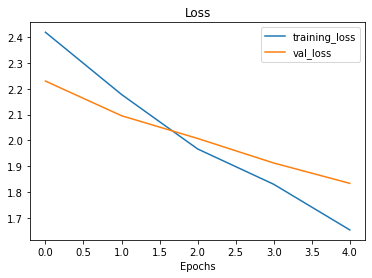

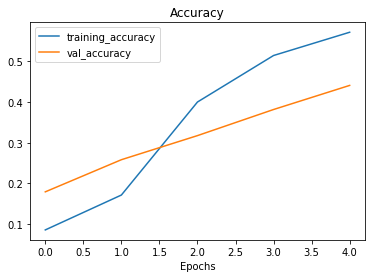

In [28]:
# plot loss curves for model 1
plot_loss_curves(history_1)

# Model 2 : Feature Extraction Transfer Learning with 10% of data and data Augmentation

Alright, we've tested 1% of the training data with data augmentation, how about we try 10% of the data with data augmentation?

In the theme of scale, let's scale our 1% training data augmentation experiment up to 10% training data augmentation. That sentence doesn't really make sense but you get what I mean.

We're going to run through the exact same steps as the previous model, the only difference being using 10% of the training data instead of 1%.

In [34]:
# set the train and test dir

train_dir_10_percent = "10_food_classes_10_percent/train"
test_dir = "10_food_classes_10_percent/test"

In [47]:
# Setup data inputs
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                            label_mode="categorical",
                                                                            image_size=IMG_SIZE)
# Note: the test data is the same as the previous experiment, we could
# skip creating this, but we'll leave this here to practice.
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [49]:


# Create a functional model with data augmentation
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential

# Build data augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal'),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomRotation(0.2),
  # preprocessing.Rescaling(1./255) # keep for ResNet50V2, remove for EfficientNet                 
], name="data_augmentation")

# Setup the input shape to our model
input_shape = (224, 224, 3)

# Create a frozen base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input and output layers
inputs = layers.Input(shape=input_shape, name="input_layer") # create input layer
x = data_augmentation(inputs) # augment our training images
x = base_model(x, training=False) # pass augmented images to base model but keep it in inference mode, so batchnorm layers don't get updated: https://keras.io/guides/transfer_learning/#build-a-model 
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)
model_2 = tf.keras.Model(inputs, outputs)

# Compile
model_2.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # use Adam optimizer with base learning rate
              metrics=["accuracy"])



In [50]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

### Creating a ModelCheckpoint callback

Our model is compiled and ready to be fit, so why haven't we fit it yet?

Well, for this experiment we're going to introduce a new callback, the **ModelCheckpoint** callback.

**The ModelCheckpoint callback gives you the ability to save your model, as a whole in the SavedModel format or the weights (patterns) only to a specified directory as it trains**.

**This is helpful if you think your model is going to be training for a long time and you want to make backups of it as it trains. It also means if you think your model could benefit from being trained for longer, you can reload it from a specific checkpoint and continue training from there.**

For example, say you fit a feature extraction transfer learning model for 5 epochs and you check the training curves and see it was still improving and you want to see if fine-tuning for another 5 epochs could help, you can load the checkpoint, unfreeze some (or all) of the base model layers and then continue training.

In fact, that's exactly what we're going to do.

But first, let's create a ModelCheckpoint callback. To do so, we have to specifcy a directory we'd like to save to.

In [44]:
os.mkdir("10_percent_model_checkpoints_weights")

In [52]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights" # note: remember saving directly to Colab is temporary

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True, # set to False to save the entire model
                                                         save_best_only=False, # set to True to save only the best model instead of a model every epoch 
                                                         save_freq="epoch", # save every epoch
                                                         verbose=1)

The **SavedModel** format saves a model's architecture, weights and training configuration all in one folder. It makes it very easy to reload your model exactly how it is elsewhere. However, if you do not want to share all of these details with others, you may want to save and share the weights only (these will just be large tensors of non-human interpretable numbers). If disk space is an issue, saving the weights only is faster and takes up less space than saving the whole model.

Time to fit the model.

Because we're going to be fine-tuning it later, we'll create a variable **initial_epochs** and set it to 5 to use later.

We'll also add in our **checkpoint_callback** in our list of **callbacks**.

In [53]:
# Fit the model saving checkpoints every epoch
initial_epochs = 5
history_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                          epochs=initial_epochs,
                                          validation_data=test_data,
                                          validation_steps=int(0.25 * len(test_data)), # do less steps per validation (quicker)
                                          callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_data_aug"), 
                                                     checkpoint_callback])

Saving TensorBoard log files to: transfer_learning/10_percent_data_aug/20211231-020633
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9746 - accuracy: 0.3293
Epoch 00001: saving model to ten_percent_model_checkpoints_weights
24/24 [==============================] - 18s 590ms/step - loss: 1.9746 - accuracy: 0.3293 - val_loss: 1.4870 - val_accuracy: 0.6398
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3798 - accuracy: 0.6413
Epoch 00002: saving model to ten_percent_model_checkpoints_weights
24/24 [==============================] - 12s 509ms/step - loss: 1.3798 - accuracy: 0.6413 - val_loss: 1.0537 - val_accuracy: 0.7747
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0817 - accuracy: 0.7253
Epoch 00003: saving model to ten_percent_model_checkpoints_weights
24/24 [==============================] - 11s 444ms/step - loss: 1.0817 - accuracy: 0.7253 - val_loss: 0.8846 - val_accuracy: 0.7895
Epoch 4/5
24/24 [====================

In [ ]:
# gpu_options = tf.GPUOptions(allow_growth=True)
# session = tf.InteractiveSession(config=tf.ConfigProto(gpu_options=gpu_options))

In [58]:
print(model_0.evaluate(test_data))
print('\n')
print('\n')


# Evaluate on the test data
results_10_percent_data_aug = model_2.evaluate(test_data)
results_10_percent_data_aug

79/79 [==============================] - 8s 99ms/step - loss: 0.6104 - accuracy: 0.8428
[0.6104270815849304, 0.8428000211715698]




79/79 [==============================] - 8s 98ms/step - loss: 0.6999 - accuracy: 0.8080


[0.6999064683914185, 0.8080000281333923]

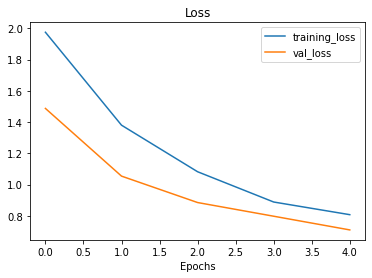

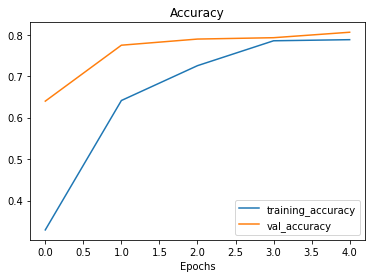

In [55]:
# plot the model loss curves
plot_loss_curves(history_10_percent_data_aug)

Looking at these, our model's performance with 10% of the data and data augmentation isn't as good as the model with 10% of the data without data augmentation (see model_0 results above), however the curves are trending in the right direction, meaning if we decided to train for longer, its metrics would likely improve.

Since we checkpointed (is that a word?) our model's weights, we might as well see what it's like to load it back in. We'll be able to test if it saved correctly by evaluting it on the test data.

**To load saved model weights you can use the the load_weights() method, passing it the path where your saved weights are stored.**

### Load in saved model with checkpointed weights and evaluate model

In [56]:
# Load in saved model weights
model_2.load_weights(checkpoint_path)

# evaluate model_2 with loaded weights
loaded_weights_model_results = model_2.evaluate(test_data)

79/79 [==============================] - 9s 105ms/step - loss: 0.6999 - accuracy: 0.8080


In [59]:
# If the results from our native model and the loaded weights are the same, this should output True
results_10_percent_data_aug == loaded_weights_model_results

False

In [62]:
results_10_percent_data_aug

[0.6999064683914185, 0.8080000281333923]

In [63]:
loaded_weights_model_results

[0.6999058723449707, 0.8080000281333923]

If the above cell doesn't output True, it's because the numbers are close but not the exact same (due to how computers store numbers with degrees of precision).

However, they should be very close...

In [60]:
import numpy as np

# Check to see if loaded model results are very close to native model results (should output True)
np.isclose(np.array(results_10_percent_data_aug), np.array(loaded_weights_model_results))

array([ True,  True])

In [61]:
# Check the difference between the two results
print(np.array(results_10_percent_data_aug) - np.array(loaded_weights_model_results))

[5.96046448e-07 0.00000000e+00]


# Model 3: Fine-tuning an existing model on 10% of the data

So far our saved model has been trained using feature extraction transfer learning for 5 epochs on 10% of the training data and data augmentation.

This means all of the layers in the base model (EfficientNetB0) were frozen during training.

For our next experiment we're going to switch to fine-tuning transfer learning. This means we'll be using the same base model except we'll be unfreezing some of its layers (ones closest to the top) and running the model for a few more epochs.

The idea with fine-tuning is to start customizing the pre-trained model more to our own data.

    🔑 Note: Fine-tuning usually works best after training a feature extraction model for a few epochs and with large amounts of data. For more on this, check out Keras' guide on Transfer learning & fine-tuning.

We've verified our loaded model's performance, let's check out its layers.

In [64]:
# Layers in loaded model
model_2.layers

In [66]:
# are these layers trainable
for layer in model_2.layers:
    print(layer.trainable)

True
True
False
True
True


In [68]:
model_2.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-traina

Alright, it looks like all of the layers in the efficientnetb0 layer are frozen. We can confirm this using the trainable_variables attribute.

In [69]:
# How many layers are trainable in our base model?
print(len(model_2.layers[2].trainable_variables)) # layer at index 2 is the EfficientNetB0 layer (the base model)

0


This is the same as our base model

In [70]:
print(len(base_model.trainable_variables))

0


In [72]:
#we can even check layer by layer to see if they are trainable (in the efficientnetbo model)
for i,layer in enumerate(model_2.layers[2].layers):
    print(i, layer.name, layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [73]:
# how many trainable variables in our base model
print(len(model_2.layers[2].trainable_variables))

0




Beautiful. This is exactly what we're after.

Now to fine-tune the base model to our own data, we're going to unfreeze the top 10 layers and continue training our model for another 5 epochs.

This means all of the base model's layers except for the last 10 will remain frozen and untrainable. And the weights in the remaining unfrozen layers will be updated during training.

Ideally, we should see the model's performance improve.

    🤔 Question: How many layers should you unfreeze when training?

There's no set rule for this. You could unfreeze every layer in the pretrained model or you could try unfreezing one layer at a time. Best to experiment with different amounts of unfreezing and fine-tuning to see what happens. Generally, the less data you have, the less layers you want to unfreeze and the more gradually you want to fine-tune.

    📖 Resource: The ULMFiT (Universal Language Model Fine-tuning for Text Classification) paper has a great series of experiments on fine-tuning models.

To begin fine-tuning, we'll unfreeze the entire base model by setting its trainable attribute to True. Then we'll refreeze every layer in the base model except for the last 10 by looping through them and setting their trainable attribute to False. Finally, we'll recompile the model.


In [77]:
# to begin fine tuning, lets start by setting last 10 layers of our base model.trainable to true
base_model.trainable = True

# Freeze all the layers except for the last 10 layers
for layer in base_model.layers[:-10]:
    layer.trainable=False
    
# Recompile (we have to recompile our model everytime we make a change to the model)
model_2.compile(loss = "categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001), # when fine tuning, we typically want to lower the learning rate by 10% so weights change gradually
               metrics = ["accuracy"])

In [78]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha



Nice! It seems all layers except for the last 10 are frozen and untrainable. This means only the last 10 layers of the base model along with the output layer will have their weights updated during training.

    🤔 Question: Why did we recompile the model?

Every time you make a change to your models, you need to recompile them.

In our case, we're using the exact same loss, optimizer and metrics as before, except this time the learning rate for our optimizer will be 10x smaller than before (0.0001 instead of Adam's default of 0.001).

We do this so the model doesn't try to overwrite the existing weights in the pretrained model too fast. In other words, we want learning to be more gradual.

    🔑 Note: There's no set standard for setting the learning rate during fine-tuning, though reductions of 2.6x-10x+ seem to work well in practice.

How many trainable variables do we have now?


In [79]:
print(len(model_2.trainable_variables))

12


In [81]:
model_2.trainable_variables

[<tf.Variable 'block7a_se_reduce/kernel:0' shape=(1, 1, 1152, 48) dtype=float32, numpy=
 array([[[[-0.05485657,  0.07178846,  0.01534605, ..., -0.09284662,
            0.0104828 , -0.02693838],
          [-0.03157939,  0.02819107, -0.05579546, ...,  0.00487578,
            0.12001809, -0.06901816],
          [-0.07792544,  0.12601745,  0.03935236, ...,  0.03086486,
           -0.01581392,  0.1306234 ],
          ...,
          [-0.07692936,  0.19920062,  0.17471024, ...,  0.03312391,
           -0.04528928, -0.09214652],
          [ 0.01010198,  0.06855008,  0.05820991, ...,  0.00131649,
           -0.08952942, -0.00476829],
          [ 0.03583075, -0.01228165,  0.04561347, ..., -0.00822134,
           -0.07354517, -0.06507882]]]], dtype=float32)>,
 <tf.Variable 'block7a_se_reduce/bias:0' shape=(48,) dtype=float32, numpy=
 array([-0.10886215, -0.13624744, -0.15257476,  0.14799541, -0.08512902,
        -0.12059905, -0.08779966, -0.08187538, -0.06925284, -0.12518929,
        -0.0819265 ,

Wonderful, it looks like our model has a total of 10 trainable variables, the last 10 layers of the base model and the weight and bias parameters of the Dense output layer.

Time to fine-tune!

We're going to continue training on from where our previous model finished. Since it trained for 5 epochs, our fine-tuning will begin on the epoch 5 and continue for another 5 epochs.

To do this, we can use the **initial_epoch** parameter of the **fit() method**. We'll pass it the last epoch of the previous model's training history **(history_10_percent_data_aug.epoch[-1]).**


### Fine Tuning the model for another 5 epochs

In [86]:
# Fine tune for another 5 epochs
fine_tune_epochs = initial_epochs+5

# refit the model(same as model_2 but with more trainable layers)
history_fine_10_percent_data_aug = model_2.fit(train_data_10_percent,
                                              epochs = fine_tune_epochs,
                                              validation_data = test_data,
                                               validation_steps = int(0.25*len(test_data)),
                                               initial_epoch = history_10_percent_data_aug.epoch[-1], # start training from the last epoch
                                               callbacks = [create_tensorboard_callback(dir_name="tranfer_learning",
                                                                                      experiment_name = "10_percent_fine_tune_last_10")])

Saving TensorBoard log files to: tranfer_learning/10_percent_fine_tune_last_10/20211231-030039
Epoch 5/10
24/24 [==============================] - 19s 568ms/step - loss: 0.7042 - accuracy: 0.8013 - val_loss: 0.5555 - val_accuracy: 0.8289
Epoch 6/10
24/24 [==============================] - 11s 464ms/step - loss: 0.5600 - accuracy: 0.8267 - val_loss: 0.5153 - val_accuracy: 0.8322
Epoch 7/10
24/24 [==============================] - 9s 388ms/step - loss: 0.4985 - accuracy: 0.8427 - val_loss: 0.5432 - val_accuracy: 0.8257
Epoch 8/10
24/24 [==============================] - 9s 379ms/step - loss: 0.4591 - accuracy: 0.8733 - val_loss: 0.5330 - val_accuracy: 0.8273
Epoch 9/10
24/24 [==============================] - 9s 393ms/step - loss: 0.4113 - accuracy: 0.8733 - val_loss: 0.4790 - val_accuracy: 0.8487
Epoch 10/10
24/24 [==============================] - 10s 403ms/step - loss: 0.3996 - accuracy: 0.8680 - val_loss: 0.4851 - val_accuracy: 0.8503


In [87]:
# evaluate the fine tunes model 3(which is actully model 2 fine tuned for another 5 epochs with top 10 layer unfrozen)
results_fine_tune_10_percent = model_2.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.5151 - accuracy: 0.8308


In [88]:
results_10_percent_data_aug

[0.6999064683914185, 0.8080000281333923]

So, we have increased our accuracy further by training for longer

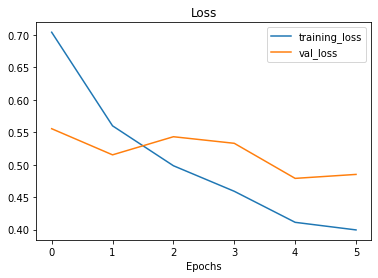

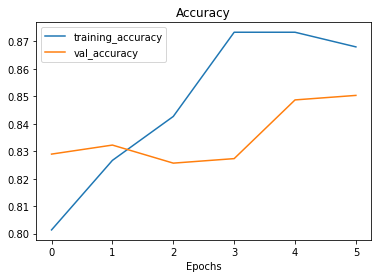

In [90]:
# check the loss curves
plot_loss_curves(history_fine_10_percent_data_aug)

### Create a Function to compare the loss curves before and after fine tuning (we want to compare training histories)

In [91]:
def compare_histories(original_history, new_history, initial_epochs=5):
    """compares two tensorflow history objects
    """
    
    # get the original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]
    
    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]
    
    # combine original history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]
    
    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]
    
    # make plots
    plt.figure(figsize=(8,8))
    plt.subplot(2,1,1)
    plt.plot(total_acc, label = "training_accuracy")
    plt.plot(total_val_acc, label = "validation_accuracy")
    plt.plot([initial_epochs-1, initial_epochs-1],
            plt.ylim(), label="start fine tuning") # reshifting plot around epochs
    plt.legend(loc = 'lower right')
    plt.title('Training and Validation Accuracy')
    
    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

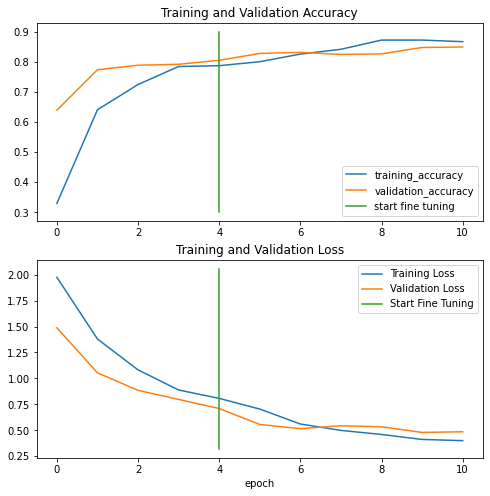

In [92]:
compare_histories(original_history=history_10_percent_data_aug, 
                 new_history=history_fine_10_percent_data_aug, 
                 initial_epochs=5)

Alright, alright, seems like the curves are heading in the right direction after fine-tuning. But remember, it should be noted that fine-tuning usually works best with larger amounts of data.

# Model 4: Fine-tuning an existing model on all of the data

Enough talk about how fine-tuning a model usually works with more data, let's try it out.

We'll start by downloading the full version of our 10 food classes dataset.

In [95]:
# Download and unzip 10 classes of data with all images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

--2021-12-31 03:22:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 2404:6800:4009:813::2010, 2404:6800:4009:80f::2010, 2404:6800:4009:811::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2404:6800:4009:813::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: '10_food_classes_all_data.zip'

     0K .......... .......... .......... .......... ..........  0% 1.59M 5m12s
    50K .......... .......... .......... .......... ..........  0% 2.98M 3m59s
   100K .......... .......... .......... .......... ..........  0% 5.36M 3m10s
   150K .......... .......... .......... .......... ..........  0% 6.59M 2m41s
   200K .......... .......... .......... .......... ..........  0% 9.67M 2m19s
   250K .......... .......... .......... .......... ..........  0% 7.94M 2m6s
   300K .......... .......... ....

 57350K .......... .......... .......... .......... .......... 11% 11.1M 47s
 57400K .......... .......... .......... .......... .......... 11% 12.2M 46s
 57450K .......... .......... .......... .......... .......... 11% 11.5M 46s
 57500K .......... .......... .......... .......... .......... 11% 10.1M 46s
 57550K .......... .......... .......... .......... .......... 11% 13.2M 46s
 57600K .......... .......... .......... .......... .......... 11% 8.59M 46s
 57650K .......... .......... .......... .......... .......... 11% 12.4M 46s
 57700K .......... .......... .......... .......... .......... 11% 11.1M 46s
 57750K .......... .......... .......... .......... .......... 11% 10.7M 46s
 57800K .......... .......... .......... .......... .......... 11% 12.8M 46s
 57850K .......... .......... .......... .......... .......... 11% 11.4M 46s
 57900K .......... .......... .......... .......... .......... 11% 11.2M 46s
 57950K .......... .......... .......... .......... .......... 11% 13.2M 46s

104200K .......... .......... .......... .......... .......... 20% 11.4M 41s
104250K .......... .......... .......... .......... .......... 20% 11.5M 41s
104300K .......... .......... .......... .......... .......... 20% 8.04M 41s
104350K .......... .......... .......... .......... .......... 20% 14.2M 41s
104400K .......... .......... .......... .......... .......... 20% 11.0M 41s
104450K .......... .......... .......... .......... .......... 20% 12.9M 41s
104500K .......... .......... .......... .......... .......... 20% 10.6M 41s
104550K .......... .......... .......... .......... .......... 20% 11.3M 41s
104600K .......... .......... .......... .......... .......... 20% 11.0M 41s
104650K .......... .......... .......... .......... .......... 20% 12.2M 41s
104700K .......... .......... .......... .......... .......... 20% 8.69M 41s
104750K .......... .......... .......... .......... .......... 20% 11.9M 41s
104800K .......... .......... .......... .......... .......... 20% 11.9M 41s

155650K .......... .......... .......... .......... .......... 30% 10.3M 34s
155700K .......... .......... .......... .......... .......... 30% 11.9M 34s
155750K .......... .......... .......... .......... .......... 30% 10.5M 34s
155800K .......... .......... .......... .......... .......... 30% 13.7M 34s
155850K .......... .......... .......... .......... .......... 30% 10.2M 34s
155900K .......... .......... .......... .......... .......... 30% 12.0M 34s
155950K .......... .......... .......... .......... .......... 30% 11.6M 34s
156000K .......... .......... .......... .......... .......... 30% 9.15M 34s
156050K .......... .......... .......... .......... .......... 30% 11.1M 34s
156100K .......... .......... .......... .......... .......... 30% 11.3M 34s
156150K .......... .......... .......... .......... .......... 30% 10.8M 34s
156200K .......... .......... .......... .......... .......... 30% 13.4M 34s
156250K .......... .......... .......... .......... .......... 30% 11.4M 34s

200500K .......... .......... .......... .......... .......... 39% 11.0M 30s
200550K .......... .......... .......... .......... .......... 39% 11.0M 30s
200600K .......... .......... .......... .......... .......... 39% 11.1M 30s
200650K .......... .......... .......... .......... .......... 39% 11.2M 30s
200700K .......... .......... .......... .......... .......... 39% 12.3M 30s
200750K .......... .......... .......... .......... .......... 39% 12.0M 30s
200800K .......... .......... .......... .......... .......... 39% 8.32M 30s
200850K .......... .......... .......... .......... .......... 39% 11.3M 30s
200900K .......... .......... .......... .......... .......... 39% 13.2M 30s
200950K .......... .......... .......... .......... .......... 39% 10.6M 30s
201000K .......... .......... .......... .......... .......... 39% 12.5M 30s
201050K .......... .......... .......... .......... .......... 39% 10.9M 30s
201100K .......... .......... .......... .......... .......... 39% 12.3M 30s

236100K .......... .......... .......... .......... .......... 46% 10.9M 26s
236150K .......... .......... .......... .......... .......... 46% 14.2M 26s
236200K .......... .......... .......... .......... .......... 46% 10.4M 26s
236250K .......... .......... .......... .......... .......... 46% 11.0M 26s
236300K .......... .......... .......... .......... .......... 46% 13.5M 26s
236350K .......... .......... .......... .......... .......... 46% 11.1M 26s
236400K .......... .......... .......... .......... .......... 46% 8.54M 26s
236450K .......... .......... .......... .......... .......... 46% 12.3M 26s
236500K .......... .......... .......... .......... .......... 46% 11.8M 26s
236550K .......... .......... .......... .......... .......... 46% 10.6M 26s
236600K .......... .......... .......... .......... .......... 46% 12.1M 26s
236650K .......... .......... .......... .......... .......... 46% 11.7M 26s
236700K .......... .......... .......... .......... .......... 46% 11.4M 26s

266100K .......... .......... .......... .......... .......... 52% 11.7M 23s
266150K .......... .......... .......... .......... .......... 52% 9.81M 23s
266200K .......... .......... .......... .......... .......... 52% 12.5M 23s
266250K .......... .......... .......... .......... .......... 52% 11.4M 23s
266300K .......... .......... .......... .......... .......... 52% 8.89M 23s
266350K .......... .......... .......... .......... .......... 52% 12.9M 23s
266400K .......... .......... .......... .......... .......... 52% 11.3M 23s
266450K .......... .......... .......... .......... .......... 52% 10.8M 23s
266500K .......... .......... .......... .......... .......... 52% 13.0M 23s
266550K .......... .......... .......... .......... .......... 52% 11.9M 23s
266600K .......... .......... .......... .......... .......... 52% 10.6M 23s
266650K .......... .......... .......... .......... .......... 52% 11.2M 23s
266700K .......... .......... .......... .......... .......... 52% 8.86M 23s

289150K .......... .......... .......... .......... .......... 57% 12.3M 21s
289200K .......... .......... .......... .......... .......... 57% 9.17M 21s
289250K .......... .......... .......... .......... .......... 57% 10.8M 21s
289300K .......... .......... .......... .......... .......... 57% 12.5M 21s
289350K .......... .......... .......... .......... .......... 57% 10.7M 21s
289400K .......... .......... .......... .......... .......... 57% 12.0M 21s
289450K .......... .......... .......... .......... .......... 57% 10.9M 21s
289500K .......... .......... .......... .......... .......... 57% 11.2M 21s
289550K .......... .......... .......... .......... .......... 57% 13.7M 21s
289600K .......... .......... .......... .......... .......... 57% 8.30M 21s
289650K .......... .......... .......... .......... .......... 57% 12.6M 21s
289700K .......... .......... .......... .......... .......... 57% 11.1M 21s
289750K .......... .......... .......... .......... .......... 57% 10.8M 21s

331300K .......... .......... .......... .......... .......... 65% 22.5M 17s
331350K .......... .......... .......... .......... .......... 65% 18.0M 17s
331400K .......... .......... .......... .......... .......... 65% 20.5M 17s
331450K .......... .......... .......... .......... .......... 65% 27.2M 17s
331500K .......... .......... .......... .......... .......... 65% 22.6M 17s
331550K .......... .......... .......... .......... .......... 65% 18.8M 17s
331600K .......... .......... .......... .......... .......... 65% 14.8M 17s
331650K .......... .......... .......... .......... .......... 65% 22.9M 17s
331700K .......... .......... .......... .......... .......... 65% 23.8M 17s
331750K .......... .......... .......... .......... .......... 65% 27.4M 17s
331800K .......... .......... .......... .......... .......... 65% 17.3M 17s
331850K .......... .......... .......... .......... .......... 65% 20.6M 17s
331900K .......... .......... .......... .......... .......... 65% 29.4M 17s

381450K .......... .......... .......... .......... .......... 75% 14.0M 12s
381500K .......... .......... .......... .......... .......... 75% 15.8M 12s
381550K .......... .......... .......... .......... .......... 75% 19.1M 12s
381600K .......... .......... .......... .......... .......... 75% 19.2M 12s
381650K .......... .......... .......... .......... .......... 75% 19.9M 12s
381700K .......... .......... .......... .......... .......... 75% 19.3M 12s
381750K .......... .......... .......... .......... .......... 75% 15.6M 12s
381800K .......... .......... .......... .......... .......... 75% 9.60M 12s
381850K .......... .......... .......... .......... .......... 75% 12.4M 12s
381900K .......... .......... .......... .......... .......... 75% 14.1M 12s
381950K .......... .......... .......... .......... .......... 75% 18.0M 12s
382000K .......... .......... .......... .......... .......... 75% 16.7M 12s
382050K .......... .......... .......... .......... .......... 75% 18.7M 12s

431550K .......... .......... .......... .......... .......... 85% 13.0M 7s
431600K .......... .......... .......... .......... .......... 85% 11.3M 7s
431650K .......... .......... .......... .......... .......... 85% 8.53M 7s
431700K .......... .......... .......... .......... .......... 85% 11.5M 7s
431750K .......... .......... .......... .......... .......... 85% 9.67M 7s
431800K .......... .......... .......... .......... .......... 85% 10.1M 7s
431850K .......... .......... .......... .......... .......... 85% 8.24M 7s
431900K .......... .......... .......... .......... .......... 85% 10.6M 7s
431950K .......... .......... .......... .......... .......... 85% 7.94M 7s
432000K .......... .......... .......... .......... .......... 85% 9.39M 7s
432050K .......... .......... .......... .......... .......... 85% 6.67M 7s
432100K .......... .......... .......... .......... .......... 85% 10.1M 7s
432150K .......... .......... .......... .......... .......... 85% 9.75M 7s
432200K ....

472850K .......... .......... .......... .......... .......... 93% 12.3M 3s
472900K .......... .......... .......... .......... .......... 93% 11.4M 3s
472950K .......... .......... .......... .......... .......... 93% 7.46M 3s
473000K .......... .......... .......... .......... .......... 93% 14.9M 3s
473050K .......... .......... .......... .......... .......... 93% 11.8M 3s
473100K .......... .......... .......... .......... .......... 93% 12.1M 3s
473150K .......... .......... .......... .......... .......... 93% 10.6M 3s
473200K .......... .......... .......... .......... .......... 93% 10.9M 3s
473250K .......... .......... .......... .......... .......... 93% 12.7M 3s
473300K .......... .......... .......... .......... .......... 93% 10.8M 3s
473350K .......... .......... .......... .......... .......... 93% 10.3M 3s
473400K .......... .......... .......... .......... .......... 93% 11.3M 3s
473450K .......... .......... .......... .......... .......... 93% 11.0M 3s
473500K ....

In [96]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [98]:
# Setup data inputs
IMG_SIZE = (224, 224)

train_data_10_classes_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                label_mode = "categorical",
                                                                                image_size = IMG_SIZE)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)



Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


The test dataset is the same we've been using for our previous experiments.

As it is now, our model_2 has been fine-tuned on 10 percent of the data, so to begin fine-tuning on all of the data and keep our experiments consistent, we need to revert it back to the weights we checkpointed after 5 epochs of feature-extraction.

To demonstrate this, we'll first evaluate the current model_2.


In [99]:
# evaluate model_2  (this is the fine tuned on 10% of data version)
model_2.evaluate(test_data)

79/79 [==============================] - 9s 102ms/step - loss: 0.5151 - accuracy: 0.8308


[0.5150555372238159, 0.8307999968528748]

In [100]:
results_fine_tune_10_percent

[0.5150552988052368, 0.8307999968528748]

#### Now we'll revert the model back to the saved weights.
To train a fine tuning model (model 4) we need to revert model_2 back to its feature extraction weights

In [101]:
# Load weights from checkpoint, this way we can fine tune from the same
# stage the 10 percent data model was fine tuned from.

model_2.load_weights(checkpoint_path) # revert model back to saved weights

In [102]:
# let's evaluate model_2 now
model_2.evaluate(test_data)

79/79 [==============================] - 9s 108ms/step - loss: 0.6999 - accuracy: 0.8080


[0.6999061703681946, 0.8080000281333923]

In [103]:
# check to see if our model2 has been reverted back to feature extraction results
results_10_percent_data_aug

[0.6999064683914185, 0.8080000281333923]



Alright, the previous steps might seem quite confusing but all we've done is:

1. Trained a feature extraction transfer learning model for 5 epochs on 10% of the data (with all base model layers frozen) and saved the model's weights using ModelCheckpoint.(model_2)
2. Fine-tuned the same model on the same 10% of the data for a further 5 epochs with the top 10 layers of the base model unfrozen. (model_3)
3. Saved the results and training logs each time.
4. Reloaded the model from 1 to do the same steps as 2 but with all of the data. (model_4)

The same steps as 2?

Yeah, we're going to fine-tune the last 10 layers of the base model with the full dataset for another 5 epochs but first let's remind ourselves which layers are trainable.

In [106]:
for layer_number, layer in enumerate(model_2.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_layer True
1 data_augmentation True
2 efficientnetb0 True
3 global_average_pooling_layer True
4 output_layer True


In [104]:
# Check which layers are tuneable in the base model
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_6 False
1 rescaling_5 False
2 normalization_5 False
3 stem_conv_pad False
4 stem_conv False
5 stem_bn False
6 stem_activation False
7 block1a_dwconv False
8 block1a_bn False
9 block1a_activation False
10 block1a_se_squeeze False
11 block1a_se_reshape False
12 block1a_se_reduce False
13 block1a_se_expand False
14 block1a_se_excite False
15 block1a_project_conv False
16 block1a_project_bn False
17 block2a_expand_conv False
18 block2a_expand_bn False
19 block2a_expand_activation False
20 block2a_dwconv_pad False
21 block2a_dwconv False
22 block2a_bn False
23 block2a_activation False
24 block2a_se_squeeze False
25 block2a_se_reshape False
26 block2a_se_reduce False
27 block2a_se_expand False
28 block2a_se_excite False
29 block2a_project_conv False
30 block2a_project_bn False
31 block2b_expand_conv False
32 block2b_expand_bn False
33 block2b_expand_activation False
34 block2b_dwconv False
35 block2b_bn False
36 block2b_activation False
37 block2b_se_squeeze False
38 block2b_se_resha

In [105]:
# Recompile
model_2.compile(loss ="categorical_crossentropy",
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=["accuracy"])

In [107]:
# Continue to train and fine tune the model to our data
fine_tune_epochs = initial_epochs + 5

history_fine_10_classes_full = model_2.fit(train_data_10_classes_full,
                                          epochs = fine_tune_epochs,
                                          validation_data = test_data,
                                          validation_steps = int(0.25* len(test_data)),
                                          initial_epoch = history_10_percent_data_aug.epoch[-1],
                                          callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                                  experiment_name = "full_10_classe_fine_tune_last_10")])

Saving TensorBoard log files to: transfer_learning/full_10_classe_fine_tune_last_10/20211231-034940
Epoch 5/10
235/235 [==============================] - 78s 293ms/step - loss: 0.7436 - accuracy: 0.7593 - val_loss: 0.4222 - val_accuracy: 0.8536
Epoch 6/10
235/235 [==============================] - 56s 236ms/step - loss: 0.5964 - accuracy: 0.8055 - val_loss: 0.3864 - val_accuracy: 0.8717
Epoch 7/10
235/235 [==============================] - 53s 224ms/step - loss: 0.5273 - accuracy: 0.8291 - val_loss: 0.3521 - val_accuracy: 0.8766
Epoch 8/10
235/235 [==============================] - 50s 211ms/step - loss: 0.4849 - accuracy: 0.8427 - val_loss: 0.3583 - val_accuracy: 0.8766
Epoch 9/10
235/235 [==============================] - 47s 199ms/step - loss: 0.4495 - accuracy: 0.8535 - val_loss: 0.3431 - val_accuracy: 0.8882
Epoch 10/10
235/235 [==============================] - 48s 205ms/step - loss: 0.4235 - accuracy: 0.8623 - val_loss: 0.3199 - val_accuracy: 0.8816


In [108]:
results_fine_tune_full_data = model_2.evaluate(test_data)
results_fine_tune_full_data

79/79 [==============================] - 9s 108ms/step - loss: 0.3188 - accuracy: 0.8932


[0.3188362419605255, 0.8931999802589417]

Nice! It looks like fine-tuning with all of the data has given our model a boost, how do the training curves look?

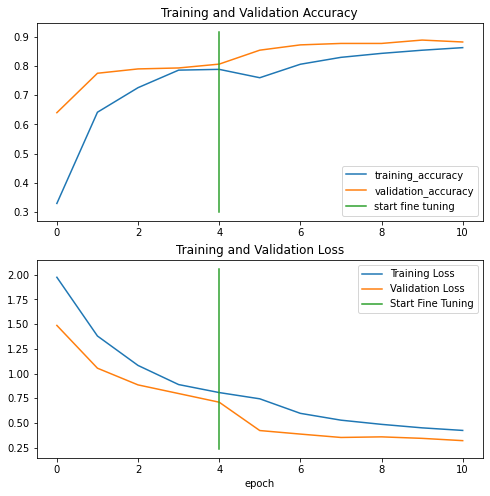

In [110]:
# How did fine-tuning go with more data?
compare_histories(original_history=history_10_percent_data_aug,
                 new_history=history_fine_10_classes_full,
                 initial_epochs=5)

# Viewing our experiment data on TensorBoard

In [111]:
%load_ext tensorboard
%tensorboard --logdir="C:\Users\anmol\Desktop\TF\Udemy ZTM\6. Transfer Learning (Part 2)\transfer_learning"